# Реализация логистической регрессии в TensorFlow

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

## Генерируем данные для задачи регрессии

In [3]:
NUM_FEATURES = 2
NUM_SAMPLES = 1000

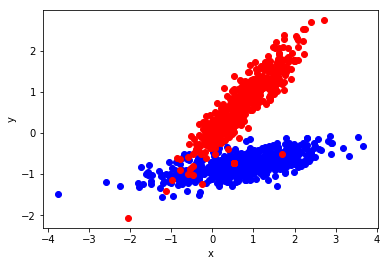

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = NUM_SAMPLES,
                           n_features = NUM_FEATURES,
                           n_informative = NUM_FEATURES,
                           n_redundant = 0,
                           n_classes = 2,
                           n_clusters_per_class = 1,
                           class_sep = 0.75,
                           random_state = 54312)

y = y.reshape(-1, 1)

ones = np.where(y == 1)   # индексы объектов класса '1'
zeros = np.where(y == 0)  # индексы объектов класса '0'

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[ones, 0], X[ones, 1], 'ob',
         X[zeros, 0], X[zeros, 1], 'or');

## Вспомогательная функция для создания операций

In [5]:
import string

def py_func_with_grad(func, inp, Tout, grad, name = None, stateful = False, graph = None):
    
    name_prefix = ''.join(np.random.choice(list(string.ascii_letters), size = 10))
    
    name = '%s_%s' % (name_prefix, name or '')
    grad_func_name = '%s_grad' % name

    tf.RegisterGradient(grad_func_name)(grad)

    g = graph or tf.get_default_graph()
    with g.gradient_override_map({'PyFunc': grad_func_name, 
                                  'PyFuncStateless': grad_func_name}):
        with tf.name_scope(name, 'PyFuncOp', inp):
            return tf.py_func(func, inp, Tout, stateful = stateful, name = name)

## Реализация линейной опреаций

In [6]:
def linear_op_forward(X, W):
    ''' Реализация линейной операции '''
    
$$h_\theta(x_i) = \theta_0 + \theta_1x$$

#Это простая линейная регрессия с двумя коэффициентами.


$$p(y_i | x_i) = [h_\theta(x_i)]^{(y_i)} [1 - h_\theta(x_i)]^{(1 - y_i)}$$

#Бинарная классификация

    
    def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(NUM_SAMPLES):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
    
    
    
    #return 1 / (1 + np.exp(-X))
    #скалярно перемножаем входные данные и их веса
    return np.dot(X, W.T)  # аргументы являются numpy-массивами

def linear_op_backward(op, grads): # grads градиенты из предыдущего шага - это loss из предыдущего шага - производная от loss по выходу модели - 
    #MSE среднеквадратичная ошибка -> производная среднеквадратичной ошибки по выходу алгоритм передаст нам на вход
    #необходимо для каждого входа операции вернуть свою производную - вернуть градиент на выход
    #MSE-ошибка - это сумма по всем примерам квадрата отклонения предсказания от истинного значения:

$$J = \frac{1}{N} \sum_{i=1}^{N} (y_i - h_\theta(x_i))^2$$

#оптимизация MSE-Loss - это просто максимизация правдоподобия
$$J = \frac{1}{2}\sum_{i=1}^{N}(y_i - \theta^Tx_i)^2$$
    
    #from sklearn.metrics import mean_squared_error
    #mean_squared_error(y_true, y_pred)

#loss:

$$J = -\sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

#x_entropy_loss = - (Y_label * np.log(Y_pred)) - ((1. - Y_label) * np.log(1. - Y_pred))
    
    
    #sigmoid = op.outputs[0]
    #return sigmoid * (1 - sigmoid) * grads
    
    ''' Реализация вычисления градиента линейной операции '''
    X = op.inputs[0]  # тензор входных данных
    W = op.inputs[1]  # тензор параметров модели
    dX = tf.multiply(grads, W)
    dW = tf.reduce_sum(tf.multiply(X, grads),
                       axis = 0,
                       keep_dims = True)
    
    
---
    x = numpy.linspace(0,10,1000)
    dx = x[1]-x[0]
    y = x**2 + 1
    dydx = numpy.gradient(y, dx)
    
    #или
    
    
    import autograd.numpy as np
    from autograd import grad

    def fct(x):
    y = x**2+1
    return y

    grad_fct = grad(fct)
    print(grad_fct(1.0))
    
    return dX, dW
---




def sigmoid_op_forward(X):
    # TODO: реализовать операцию sigmoid
    
    
    def nonlin(x,deriv=False):
    if(deriv==True):
        return f(x)*(1-f(x))
    return 1/(1+np.exp(-x))
    
    
    
    z = 1/(1 + np.exp(-np.dot(W, x))) # the sigmoid function - forward pass
    
    
    
    
    #def sigmoid(x):
    #a = []
    #for item in x:
       # a.append(1/(1+np.exp(-X))) #the sigmoid function
    #return a





#outputs probability between 0 and 1, used to help define our logistic regression curve
#def sigmoid(x):
    #'''Sigmoid function of x.'''
    #return 1/(1+np.exp(-x))

    
    #dot = w[0]*x[0] + w[1]*x[1] + w[2]
    #f = 1.0 / (1 + np.exp(-dot)) # sigmoid function
    
    return np.zeros_like(X)

def sigmoid_op_backward(op, grads):
    # TODO: реализовать вычисление градиента для sigmoid
    
    dx = np.dot(W.T, z*(1-z)) # backward pass: local gradient for x
    dW = np.outer(z*(1-z), x) # backward pass: local gradient for W
    
    
    return tf.zeros([1, 1])

## Создание графа вычислений и обучение модели

In [7]:
BATCH_SIZE = NUM_SAMPLES // 10

weights = None  # в этой переменной мы сохраним результат обучения модели
learning_curve = []  # значения ошибки на каждой итерации обучения

with tf.Session(graph = tf.Graph()) as sess:  # инициализируем сессию вычислений
    
    # создаем placeholdr'ы, через них мы будем
    # передавать внешние данные в граф вычислений
    plh_X = tf.placeholder(dtype = tf.float32, shape = [None, NUM_FEATURES])
    plh_labels = tf.placeholder(dtype = tf.float32, shape = [None, 1])

    # создаем переменную для хранения весов модели
    # эти веса будут изменяться в процессе обучения
    var_W = tf.Variable(tf.random_uniform(shape = [1, NUM_FEATURES],
                                          dtype = tf.float32,
                                          seed = 54321))
    
    # создаем переменную для результата предсказания модели
    var_Pred = py_func_with_grad(linear_op_forward,         # функция предсказания модели 
                                 [plh_X, var_W],            # аргументы функции
                                 [tf.float32],              # тип выходных значений
                                 name = 'linear_op',        # имя операции 
                                 grad = linear_op_backward, # функция для вычисления градиента
                                 graph = sess.graph)        # объект графа вчислений
    
    # создаем переменную для результата операции sigmoid
    var_Sigmoid = py_func_with_grad(sigmoid_op_forward,
                                    [var_Pred],
                                    [tf.float32],
                                    name = 'sigmoid_op',
                                    grad = sigmoid_op_backward,
                                    graph = sess.graph)
    
    # кроссэнтропийная функция потерь для бинарной классификации
    cost = tf.losses.sigmoid_cross_entropy(plh_labels, var_Sigmoid)
    
    # инициализируем оптимизатор и указываем скорость обучения
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.9).minimize(cost)

    # инициализируем placeholder'ы и переменные
    sess.run(tf.global_variables_initializer())
    
    indices = np.arange(len(X))  # массив индексов объектов
    
    # выполняем итерации по 10-ти эпохам
    for epoch in range(10):
        
        # вначале каждой эпохи перемешиваем индексы
        np.random.shuffle(indices)
        
        # внутри каждой эпохи данные разбиваются на батчи
        for batch in range(len(X) // BATCH_SIZE):
            
            # выбираем индексы очередного батча
            batch_indices = indices[batch * BATCH_SIZE:(batch + 1) * BATCH_SIZE]

            # выполняем шаг обучения: вычисляем ошибку и обновляем веса
            loss, _ = sess.run([cost, optimizer],  # указываем, какие операции необходимо выполнить
                               feed_dict = {plh_X: X[batch_indices],  # передаем входные данные для вычисления
                                            plh_labels: y[batch_indices]})
        
            # сохраняем занчения ошибки для построения кривой обучения
            learning_curve.append(loss)
            
            # выводим текущее значение ошибки для каждого 10го шага
            steps = len(learning_curve) - 1
            if steps % 10 == 0:
                print('[%03d] loss=%.3f weights=%s' % (steps, loss, var_W.eval()))
    
    # сохраняем обученные веса
    weights = var_W.eval()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
[000] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[010] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[020] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[030] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[040] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[050] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[060] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[070] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[080] loss=0.693 weights=[[0.42748928 0.2598269 ]]
[090] loss=0.693 weights=[[0.42748928 0.2598269 ]]


## Визуализируем кривую обучения

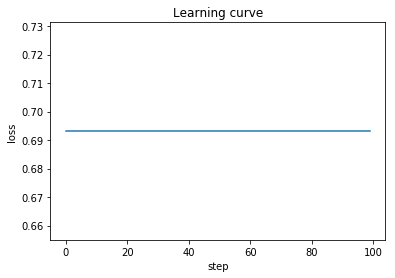

In [8]:
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Learning curve')
plt.plot(learning_curve);

## Визуализируем разделяющую гиперплоскость

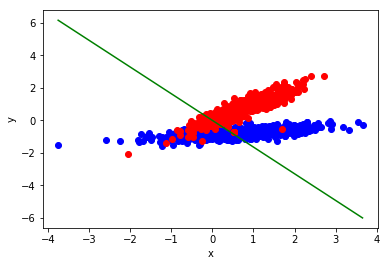

In [9]:
y_pred = - X[:, 0] * weights[0, 0] / weights[0, 1]

order = np.argsort(X[:, 0])

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[ones, 0], X[ones, 1], 'ob',
         X[zeros, 0], X[zeros, 1], 'or',
         X[order, 0], y_pred[order], '-g');